<a href="https://colab.research.google.com/github/arman18/car-price-prediction/blob/main/ML_bangladeshi_car_price_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone "https://github.com/arman18/car-price-prediction"

fatal: destination path 'car-price-prediction' already exists and is not an empty directory.


In [ ]:
%cd "/content/car-price-prediction"
DATA_DIR = "./data/"

/content/car-price-prediction


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import joblib
import seaborn as sns
import json 
import pickle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import GridSearchCV 
from statistics import stdev
from warnings import simplefilter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from dataset_feature_preprocessor import *

In [ ]:
df = pd.read_csv(f"{DATA_DIR}original_garibazar_dataset.csv")
df.head(5)

,web-scraper-order,web-scraper-start-url,container,container-href,Price,Created_date,Phone,Engine,Gearbox,Mileage,Year,Color,Body_type,Fuel_type,Air_condition,Drive_type,Condition,Model,Location
0,1667568707-2045,https://www.garirbazar.com/buy-cars,"12004 Toyota ProboxDhakaPriceBDT 600,000N/A (O...",https://www.garirbazar.com/en/vehicle_listings...,"BDT 600,000",July 03,+880130 250 1001,EngineN/A,GearboxAutomatic,Year2004,ColorSilver,Body Type4 Wheel Drives & SUVs,Fuel TypeOther,Air ConYes,Drive TypeRight,ConditionUsed,NaN,Toyota Probox,Dhaka
1,1667568710-2046,https://www.garirbazar.com/buy-cars,"32004 Nissan SunnyDhakaPriceBDT 460,000Mileage...",https://www.garirbazar.com/en/vehicle_listings...,"BDT 460,000",July 10,+880130 250 1001,EngineN/A,GearboxAutomatic,"Mileage68,000 km",Year2004,ColorGold,Body TypeSaloon,Fuel TypeOther,Air ConYes,Drive TypeRight,ConditionUsed,Nissan Sunny,Dhaka
2,1667568712-2047,https://www.garirbazar.com/buy-cars,"41998 Toyota CoronaDhakaPriceBDT 200,000Mileag...",https://www.garirbazar.com/en/vehicle_listings...,"BDT 200,000",September 23,+880130 250 1001,EngineN/A,GearboxAutomatic,"Mileage20,000 km",Year1998,ColorGold,Body Type4 Wheel Drives & SUVs,Fuel TypeOther,Air ConYes,Drive TypeRight,ConditionUsed,Toyota Corona,Dhaka
3,1667568714-2048,https://www.garirbazar.com/buy-cars,21996 Toyota StarletComillaPriceNEGOTIABLEMile...,https://www.garirbazar.com/en/vehicle_listings...,NEGOTIABLE,September 27,+880130 250 1001,EngineN/A,GearboxAutomatic,"Mileage2,001 km",Year1996,ColorBlue,Body TypeSaloon,Fuel TypePetrol,Air ConYes,Drive TypeRight,ConditionUsed,Toyota Starlet,Comilla
4,1667568717-2049,https://www.garirbazar.com/buy-cars,12011 Ford FiestaDhakaPriceNEGOTIABLEMileage60...,https://www.garirbazar.com/en/vehicle_listings...,NEGOTIABLE,September 27,+880130 250 1001,Engine1.4 L,GearboxAutomatic,"Mileage60,000 km",Year2011,ColorOrange,Body TypeSedan,Fuel TypePetrol,Air ConYes,Drive TypeRight,ConditionUsed,Ford Fiesta,Dhaka


In [ ]:
df = pre_process(df)
df.head()

,Price,Created_date,Phone,Engine,Gearbox,Mileage,Year,Color,Body_type,Fuel_type,Air_condition,Drive_type,Condition,Model,Location
0,600000,03-07-2021,+880130 250 1001,6,AUTOMATIC,71414,2004,SILVER,4 WHEEL DRIVES & SUVS,OTHER,YES,RIGHT,USED,TOYOTA PROBOX,DHAKA
1,460000,10-07-2021,+880130 250 1001,6,AUTOMATIC,68000,2004,GOLD,SALOON,OTHER,YES,RIGHT,USED,NISSAN SUNNY,DHAKA
2,200000,23-09-2021,+880130 250 1001,6,AUTOMATIC,20000,1998,GOLD,4 WHEEL DRIVES & SUVS,OTHER,YES,RIGHT,USED,TOYOTA CORONA,DHAKA
3,285,29-09-2021,+880130 250 1001,6,MANUAL,73611,2007,BLACK,VAN,OTHER,YES,RIGHT,USED,HYUNDAI H1,DHAKA
4,53000,29-09-2021,+880130 250 1001,6,MANUAL,73611,2013,BLUE,SEDAN,LPG,YES,RIGHT,USED,NISSAN SUNNY,DHAKA


In [ ]:
len(df)

2377

In [ ]:
df.describe()

,Price,Created_date,Phone,Engine,Gearbox,Mileage,Year,Color,Body_type,Fuel_type,Air_condition,Drive_type,Condition,Model,Location
count,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377
unique,679,268,1,31,2,850,33,17,18,7,2,2,3,206,19
top,2350000,11-04-2022,+880130 250 1001,15,AUTOMATIC,67172,2016,WHITE,SEDAN,PETROL,YES,RIGHT,USED,TOYOTA PREMIO,DHAKA
freq,28,75,2377,745,2155,33,263,749,1203,1100,2372,2374,1929,276,2325


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377 entries, 0 to 2376
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          2377 non-null   object
 1   Created_date   2377 non-null   object
 2   Phone          2377 non-null   object
 3   Engine         2377 non-null   object
 4   Gearbox        2377 non-null   object
 5   Mileage        2377 non-null   object
 6   Year           2377 non-null   object
 7   Color          2377 non-null   object
 8   Body_type      2377 non-null   object
 9   Fuel_type      2377 non-null   object
 10  Air_condition  2377 non-null   object
 11  Drive_type     2377 non-null   object
 12  Condition      2377 non-null   object
 13  Model          2377 non-null   object
 14  Location       2377 non-null   object
dtypes: object(15)
memory usage: 278.7+ KB


In [ ]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('-','_')
df.columns

Index(['price', 'created_date', 'phone', 'engine', 'gearbox', 'mileage',
       'year', 'color', 'body_type', 'fuel_type', 'air_condition',
       'drive_type', 'condition', 'model', 'location'],
      dtype='object')

<a id="e"></a>
#### Changing Columns Data Types 
From observing the data and analysing the datatypes of the columns we can find that certain quantitative variable columns, time data columns are in object datatype and discrete integer variables are in float data types.So we will do the necessary changes to the dataframe.

In [ ]:
df = df.convert_dtypes()
df.dtypes

price             Int64
created_date     string
phone            string
engine            Int64
gearbox          string
mileage           Int64
year              Int64
color            string
body_type        string
fuel_type        string
air_condition    string
drive_type       string
condition        string
model            string
location         string
dtype: object

In [ ]:
df["created_date"] =  pd.to_datetime(df["created_date"])
df.describe()

,price,engine,mileage,year
count,2.377000e+03,2377.000000,2377.000000,2377.000000
mean,2.561931e+06,13.193521,58853.447623,2010.564998
std,2.493064e+06,5.302745,31629.330657,6.620618
min,1.200000e+02,1.000000,0.000000,1990.000000
25%,1.180000e+06,11.000000,46533.000000,2006.000000
50%,1.850000e+06,14.000000,56174.000000,2012.000000
75%,3.000000e+06,15.000000,67172.000000,2016.000000
max,2.435000e+07,47.000000,700000.000000,2022.000000


In [ ]:
df.isna().isnull().sum()

price            0
created_date     0
phone            0
engine           0
gearbox          0
mileage          0
year             0
color            0
body_type        0
fuel_type        0
air_condition    0
drive_type       0
condition        0
model            0
location         0
dtype: int64

In [ ]:
df.nunique()

price            679
created_date     268
phone              1
engine            31
gearbox            2
mileage          850
year              33
color             17
body_type         18
fuel_type          7
air_condition      2
drive_type         2
condition          3
model            206
location          19
dtype: int64

In [ ]:
df2 = df.drop('phone', axis=1)

In [ ]:
df2.location.value_counts()

DHAKA          2325
CHITTAGONG       21
CHATTAGAM         6
SYLHET            4
RANGPUR           3
MOULVIBAZAR       3
GAZIPUR           2
COMILLA           2
KHULNA            1
NATOR             1
RAJSHAHI          1
GOPALGANJ         1
BOGRA             1
BADARGANJ         1
BHANDARIA         1
NARSINGDI         1
BARISAL           1
SIRAJGANJ         1
CHANDPUR          1
Name: location, dtype: Int64

In [ ]:
df2.loc[df2['fuel_type'] == 'LPG', 'fuel_type'] = 'GAS'
df2.loc[df2['fuel_type'] == 'DIESEL', 'fuel_type'] = 'OTHER'
df2.loc[df2['fuel_type'] == 'ELECTRIC', 'fuel_type'] = 'OTHER'
df2.fuel_type.value_counts()

PETROL    1100
GAS        806
HYBRID     366
OTHER      105
Name: fuel_type, dtype: Int64

In [ ]:
df2.body_type = df2.body_type.str.lower().replace('4 wheel drives & suvs', '4x4')
df2.body_type = df2.body_type.str.lower().replace('hatchback & station wagons', 'station_wagons')
df2.body_type = df2.body_type.str.lower().replace('hatchback', 'hatch')
df2.body_type = df2.body_type.str.lower().replace('sport car', 'suv')
df2.body_type = df2.body_type.str.lower().replace('saloon', 'sedan')
df2.body_type = df2.body_type.str.lower().replace('4x4', 'suv/4x4')
df2.body_type = df2.body_type.str.lower().replace('suv', 'suv/4x4')
df2.body_type = df2.body_type.str.lower().replace('station_wagons', 'suv/4x4')
df2.body_type = df2.body_type.str.lower().replace('buses & vans', 'mpv')
df2.body_type = df2.body_type.str.lower().replace('van', 'mpv')
df2.body_type = df2.body_type.str.lower().replace('pick up truck', 'mpv')
df2.body_type = df2.body_type.str.lower().replace('pickup', 'mpv')
df2.body_type = df2.body_type.str.lower().replace('people mover', 'mpv')
df2.body_type = df2.body_type.str.lower().replace('coupe', 'suv/4x4')
df2.body_type = df2.body_type.str.lower().replace('convertible', 'suv/4x4')
df2.body_type = df2.body_type.str.lower().replace('cabriolet', 'suv/4x4')
df2.body_type = df2.body_type.str.lower().replace('wagon', 'suv/4x4')
df2.body_type.value_counts()

sedan      1300
suv/4x4     670
hatch       215
mpv         192
Name: body_type, dtype: Int64

In [ ]:
df2.condition = df2.condition.str.replace('NEW', 'IMPORT')
df2.condition.value_counts()

USED      1929
IMPORT     448
Name: condition, dtype: Int64

In [ ]:
numeric_featurs = ["price", "engine", "year", "mileage"]
categorical_features = ["gearbox", "body_type", "fuel_type", "condition"]

In [ ]:
selected_features = numeric_featurs + categorical_features
df_new = df2[selected_features]
df_new.tail()

,price,engine,year,mileage,gearbox,body_type,fuel_type,condition
2372,6590000,8,2011,72000,AUTOMATIC,suv/4x4,PETROL,USED
2373,2020000,8,2010,61000,AUTOMATIC,sedan,PETROL,USED
2374,1035000,8,2005,67000,AUTOMATIC,sedan,GAS,USED
2375,695000,8,2002,100000,MANUAL,suv/4x4,GAS,USED
2376,1660000,8,2008,75210,AUTOMATIC,sedan,GAS,USED


# Previous

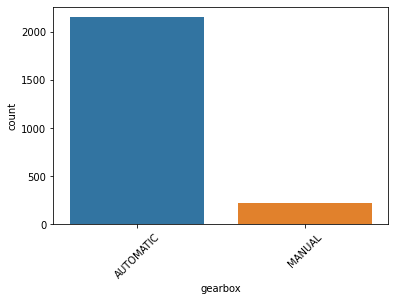

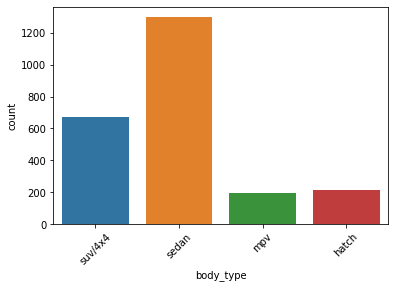

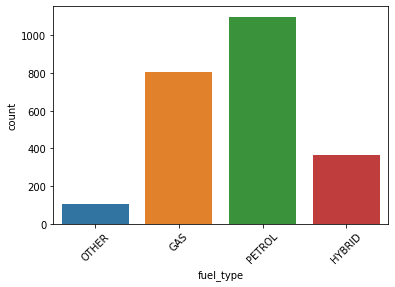

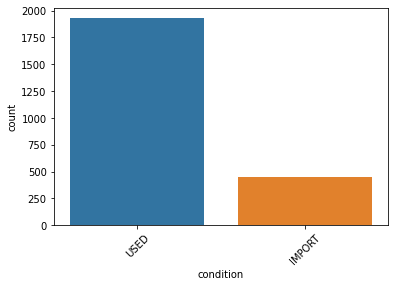

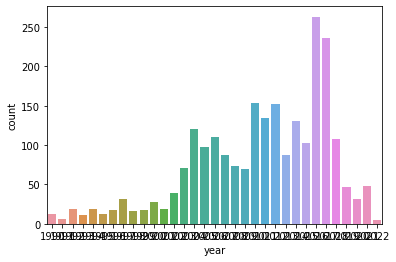

In [ ]:
for f in categorical_features:
    sns.countplot(x = f, data = df_new)
    plt.xticks(rotation=45)
    plt.show()
sns.countplot(x = "year", data = df_new)
plt.show()

In [ ]:
df_new.year = df_new.year.astype("float32")
df_new.price = df_new.price.astype("float32")
df_new.mileage = df_new.mileage.astype("float32")
df_new.engine = df_new.engine.astype("float32")
df_new.dtypes

price        float32
engine       float32
year         float32
mileage      float32
gearbox       string
body_type     string
fuel_type     string
condition     string
dtype: object

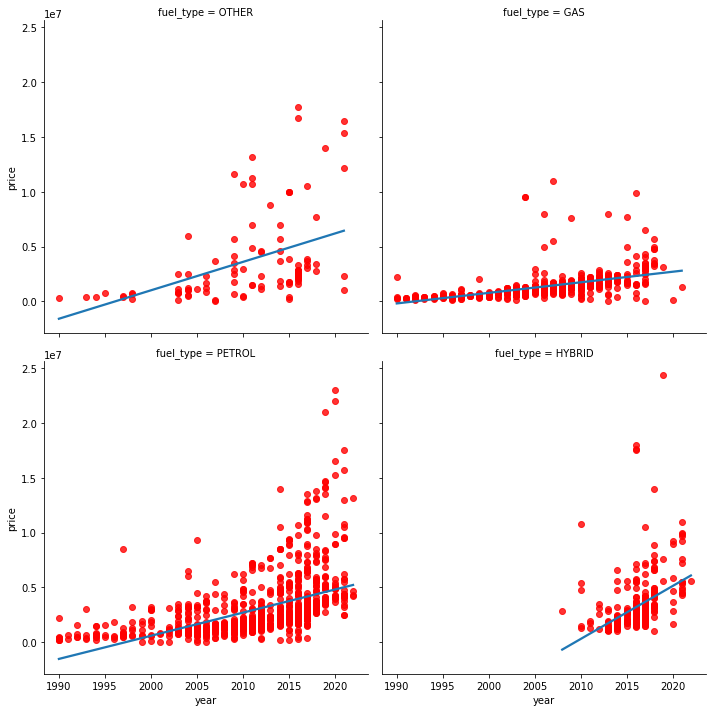

In [ ]:
# Visualising a Subset of our data - important featuresz
g = sns.lmplot(x = 'year', y = 'price', data = df_new, col = 'fuel_type', col_wrap = 2, height = 5, 
              scatter_kws = {'color':'red'}, ci = False)


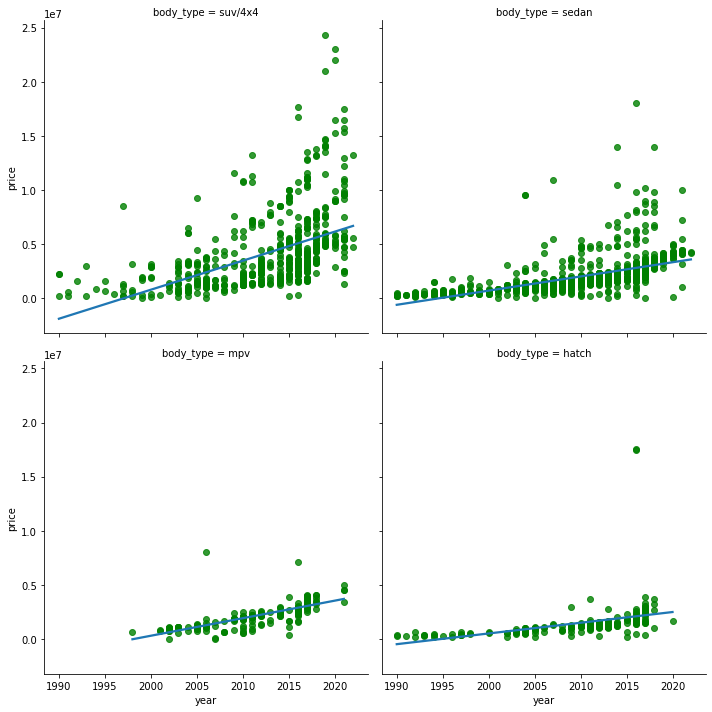

In [ ]:
g = sns.lmplot(x = 'year', y = 'price', data = df_new, col = 'body_type', col_wrap = 2, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

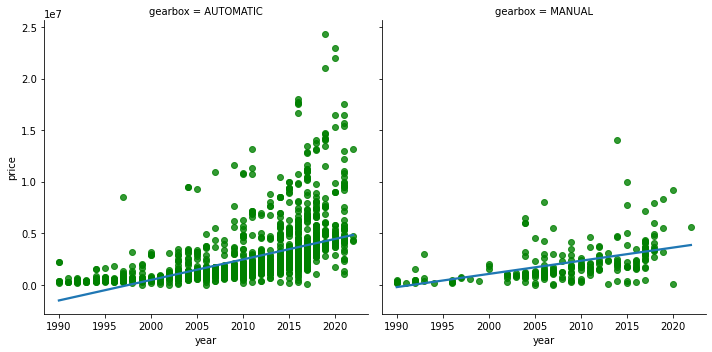

In [ ]:
g = sns.lmplot(x = 'year', y = 'price', data = df_new, col = 'gearbox', col_wrap = 2, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

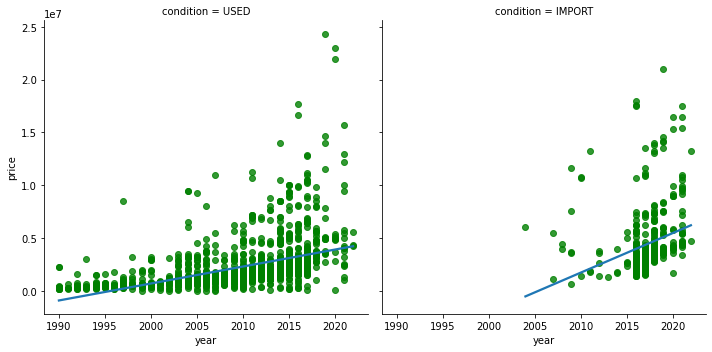

In [ ]:
g = sns.lmplot(x = 'year', y = 'price', data = df_new, col = 'condition', col_wrap = 2, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

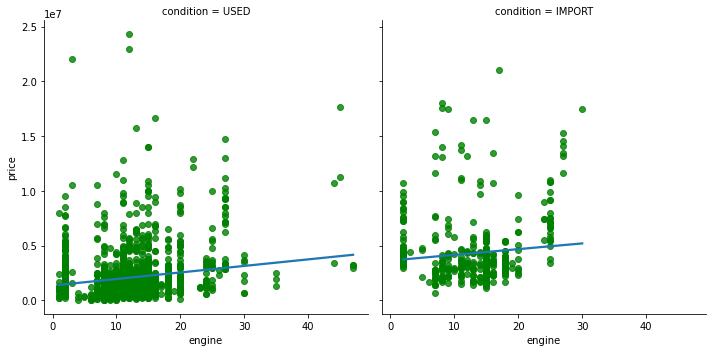

In [ ]:
g = sns.lmplot(x = 'engine', y = 'price', data = df_new, col = 'condition', col_wrap = 2, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

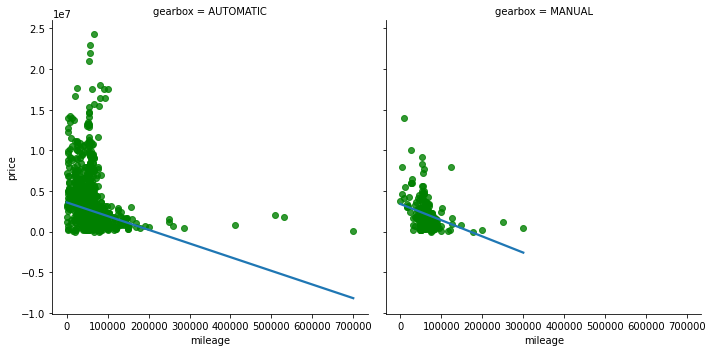

In [ ]:
g = sns.lmplot(x = 'mileage', y = 'price', data = df_new, col = 'gearbox', col_wrap = 2, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

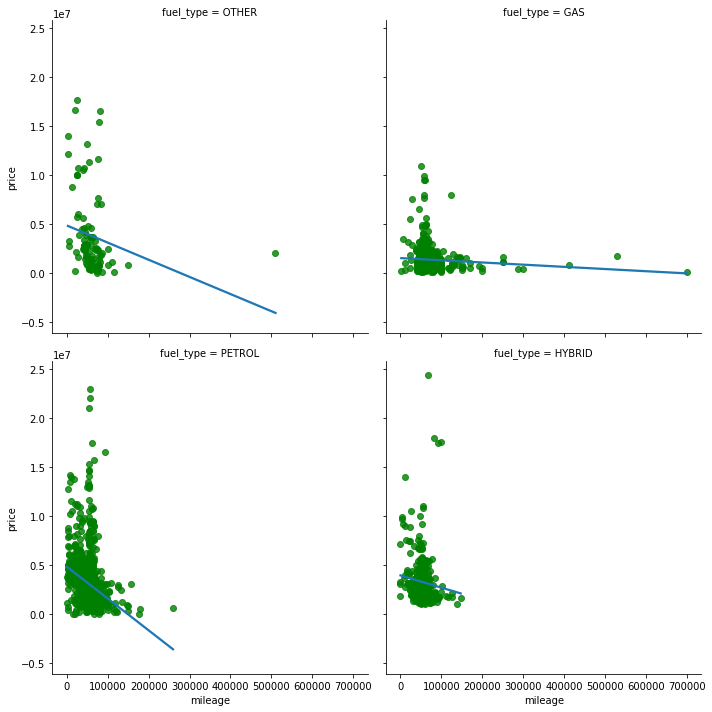

In [ ]:
g = sns.lmplot(x = 'mileage', y = 'price', data = df_new, col = 'fuel_type', col_wrap = 2, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

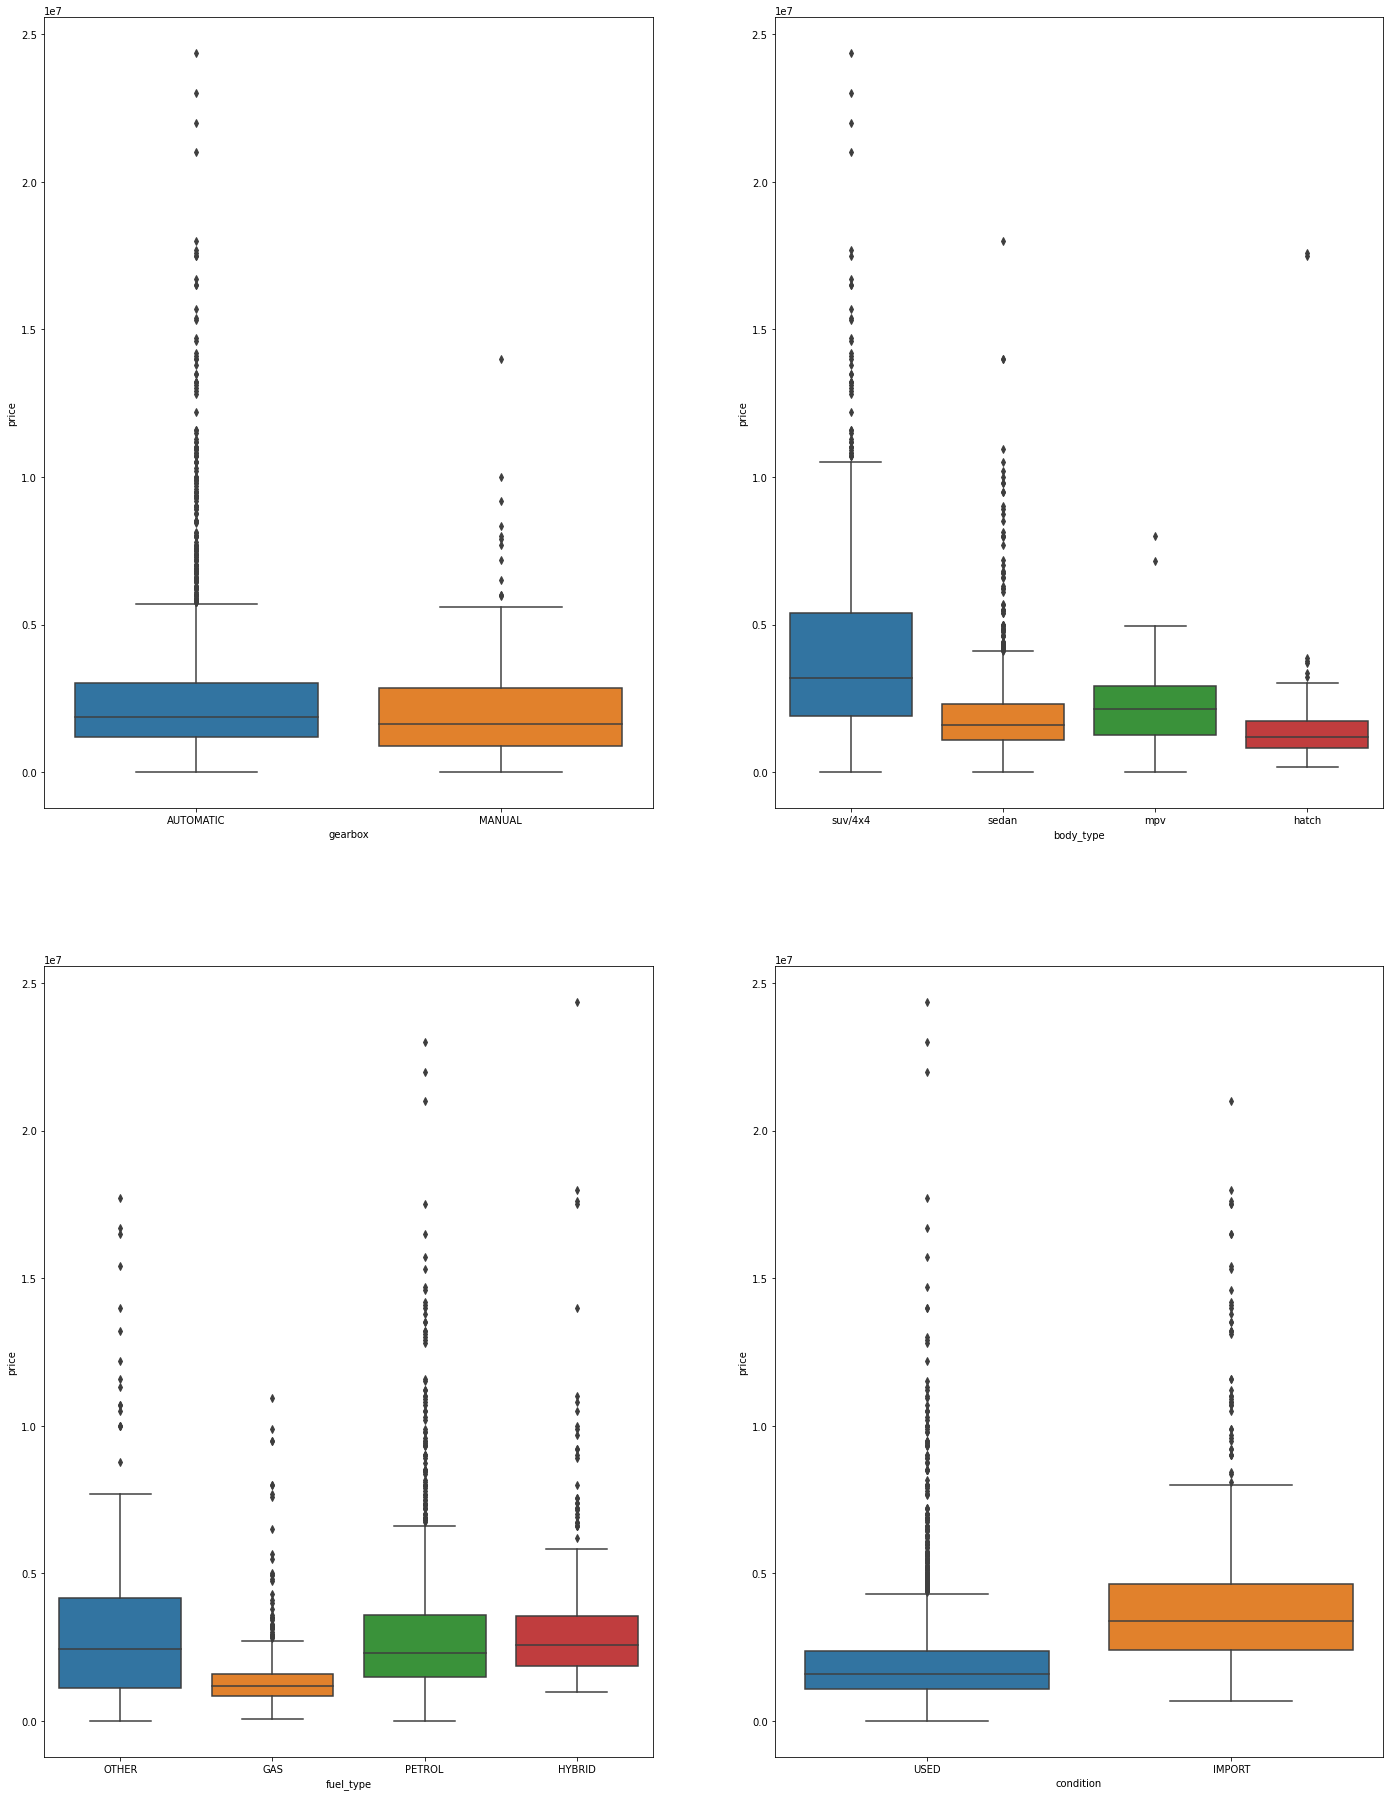

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(24, 32))
categorical = ["gearbox", "body_type", "fuel_type",  "condition"] 
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x = var, y='price', data = df_new, ax = subplot)

Here we can see that for gearbox type, AUTOMATIC Cars have highers average selling price than the manual cars. And moreover for fule type, Hybrid cars have the higher average selling price because they are latest model cars and almost new.So the selling price is High. And 4x4 body type cars also have higher average selling price. Imported cars have higher average selling price.

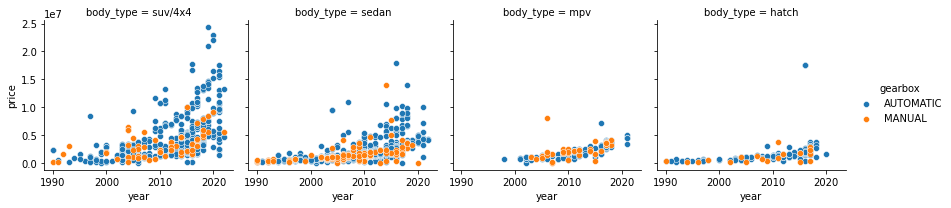

In [ ]:
cond_plot = sns.FacetGrid(data=df_new, col='body_type', hue = 'gearbox', col_wrap=4)
cond_plot.map(sns.scatterplot, 'year', 'price');
cond_plot.add_legend()

For each individual body_type we can see the relationship between year and selling price. And another categorical variable gearbox_type to the (optional) hue parameter — the orange points correspond to cars that is manual.

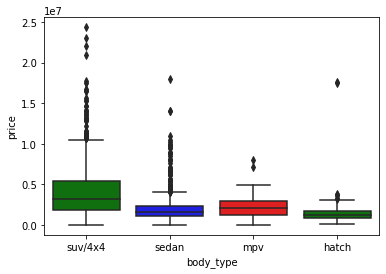

In [ ]:
pal = ['green', 'blue', 'red']
g = sns.boxplot(x = 'body_type', y = 'price', data = df_new, palette = pal)

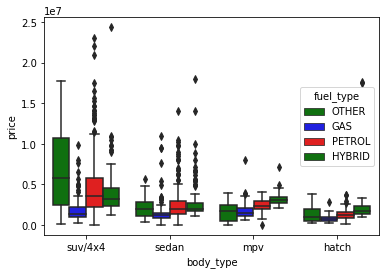

In [ ]:
g = sns.boxplot(x = 'body_type', y = 'price', hue = 'fuel_type', data = df_new, palette = pal)

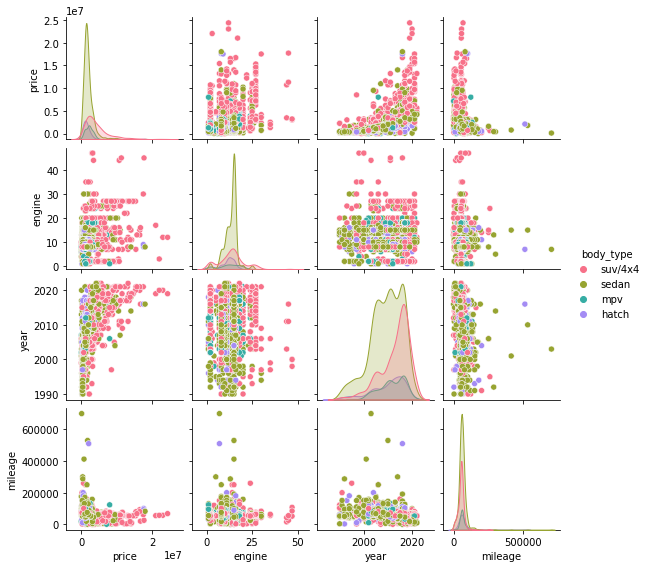

In [ ]:
sns.pairplot(df_new,hue = 'body_type',diag_kind = "kde",kind = "scatter",palette = "husl",height= 2)
plt.show()

We can see that the sedan body type cars have higher engine capacity range and also they have higher mileage . And 4x4 body type cars have wide price range.We can clearly see that there are some outliers in price and mileage

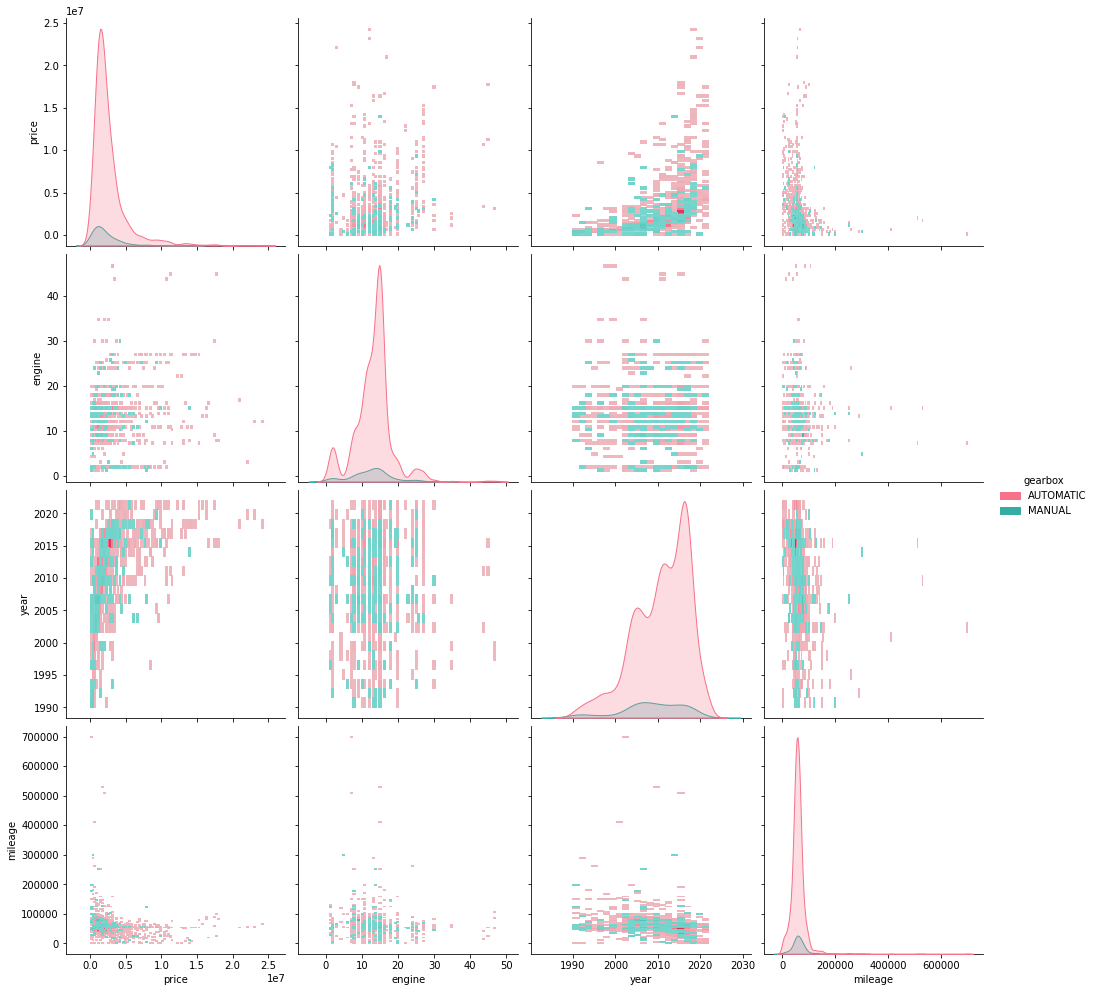

In [ ]:
sns.pairplot(df_new,hue = 'gearbox',diag_kind = "kde",kind = "hist",palette = "husl",height=3.5)
plt.show()

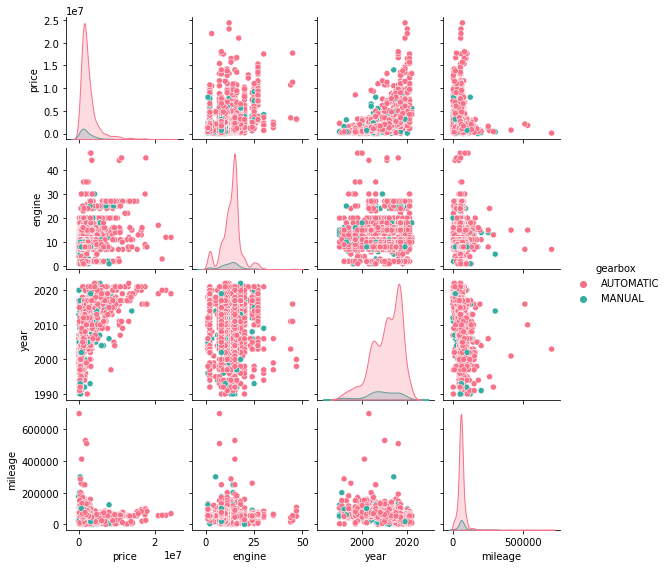

In [ ]:
sns.pairplot(df_new,hue = 'gearbox',diag_kind = "kde",kind = "scatter",palette = "husl",height=2)
plt.show()

We can see that automatic cars have higher price range than manual type cars though the distribution of automatic cars were skewed to the right. We can also see the increase of automatic cars between 2015 and 2020. In this instance, we can clearly see some outliers in price and mileage.

In [ ]:
manual = df_new[df_new['gearbox'] == 'MANUAL']
automatic = df_new[df_new['gearbox'] == 'AUTOMATIC']
hue_order_fuel_type = ['HYBRID', 'OTHER', 'PETROL', 'GAS']

MANUAL type car


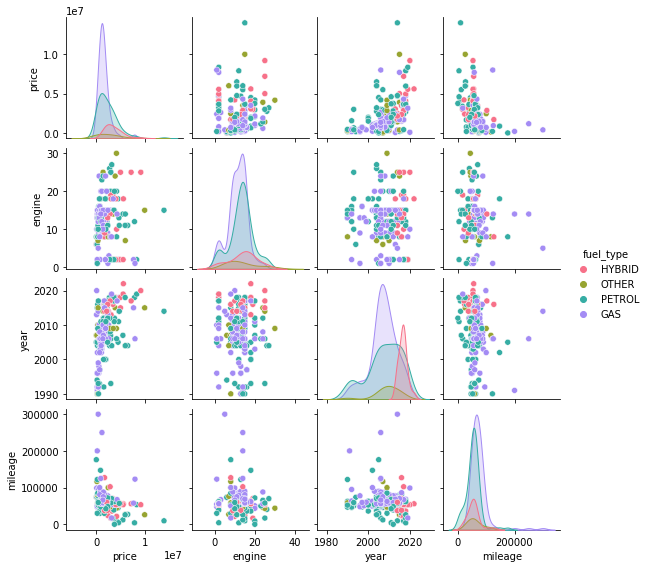

In [ ]:
print('MANUAL type car')
sns.pairplot(manual,hue ='fuel_type', hue_order = hue_order_fuel_type ,diag_kind = "kde",kind = "scatter",palette = "husl",height=2)
plt.show()

AUTOMATIC type car


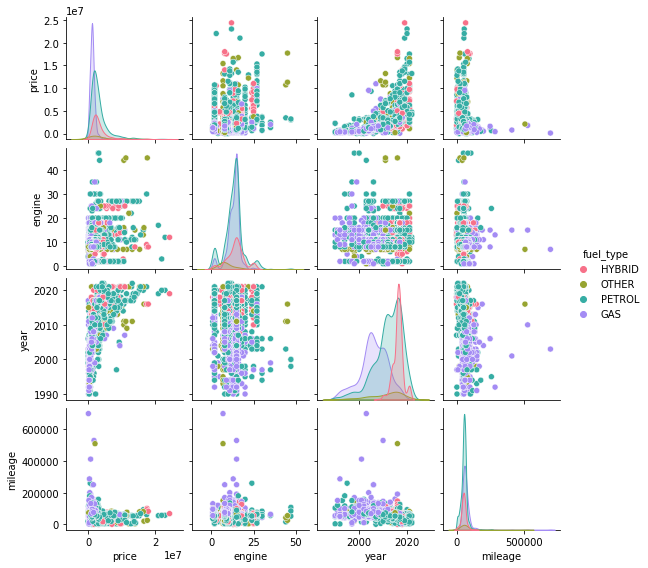

In [ ]:
print('AUTOMATIC type car')
sns.pairplot(automatic , hue = 'fuel_type', hue_order = hue_order_fuel_type , diag_kind = "kde" , kind = "scatter" , palette = "husl" , height=2)
plt.show()

We can see that the selling price of Hybrid type cars in both manual and automatic were more spread than others hence getting higher average and range of selling price

In [ ]:
km_mean = df_new.groupby('year')['mileage'].mean()
km_mean.max()

112700.0

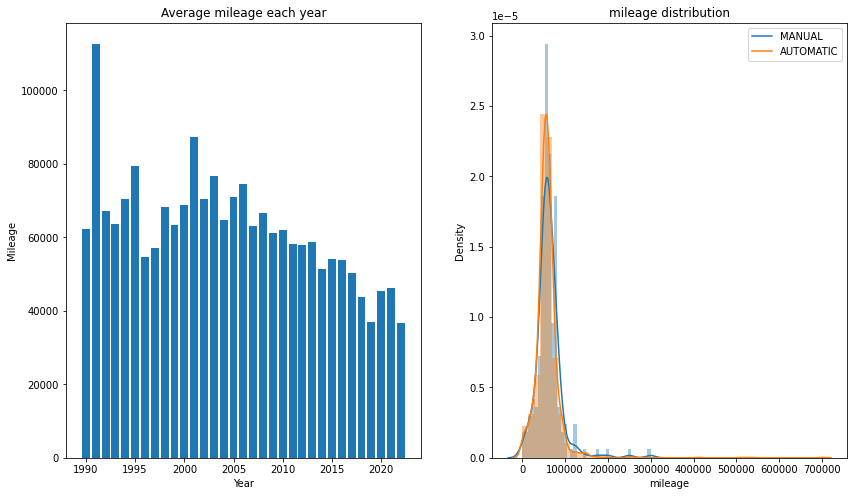

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,8))

ax[0].bar(km_mean.index,km_mean)
sns.distplot(manual['mileage'],ax=ax[1])
sns.distplot(automatic['mileage'],ax=ax[1])

ax[0].set_title('Average mileage each year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Mileage')

ax[1].set_title('mileage distribution')
ax[1].legend(['MANUAL','AUTOMATIC'])

plt.show()

We can see that average mileage driven almost linearly goes down from 1992. We can also see some outliers present in the distribution plot.

## Year and Selling Price

In [ ]:
df4 = df_new
year_mean_manual = df4[df4['gearbox']=='MANUAL'].groupby('year')['price'].mean()
year_mean_automatic = df4[df4['gearbox']=='AUTOMATIC'].groupby('year')['price'].mean()
df4.head()

,price,engine,year,mileage,gearbox,body_type,fuel_type,condition
0,600000.0,6.0,2004.0,71414.0,AUTOMATIC,suv/4x4,OTHER,USED
1,460000.0,6.0,2004.0,68000.0,AUTOMATIC,sedan,OTHER,USED
2,200000.0,6.0,1998.0,20000.0,AUTOMATIC,suv/4x4,OTHER,USED
3,285.0,6.0,2007.0,73611.0,MANUAL,mpv,OTHER,USED
4,53000.0,6.0,2013.0,73611.0,MANUAL,sedan,GAS,USED


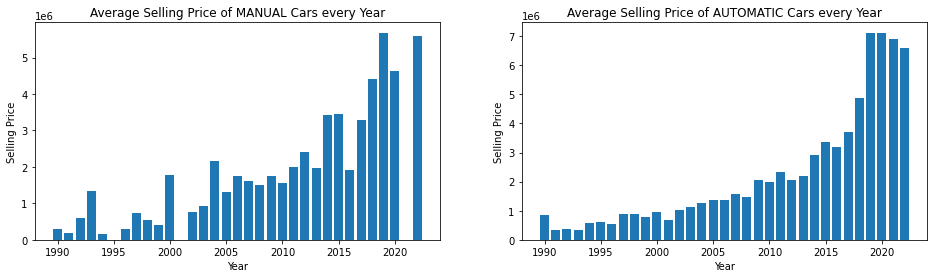

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of MANUAL Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of AUTOMATIC Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

We can see that selling price of AUTOMATIC cars grows linearly each year whereas manual cars have little wavy averages in each year but we can clearly see that selling price grows linearly as well.

# Data Cleaning || Removing Outliers

In [ ]:
df4.groupby('gearbox').agg(['mean','std','min','max']).applymap(lambda x: format(x,'.0f')).drop(['year'],axis=1)

price                         engine             mileage         \
              mean      std  min       max   mean std min max    mean    std   
gearbox                                                                        
AUTOMATIC  2605936  2537241  120  24350000     13   5   1  47   58424  31577   
MANUAL     2134768  1968593  130  14000000     12   6   1  30   63020  31902   

                       
          min     max  
gearbox                
AUTOMATIC   0  700000  
MANUAL      0  300000

Clearly we have some outliers present in mileage and selling price. We need to remove these outliers by using IQR method.

In [ ]:
def remove_outlier_km_driven(df):
    temp = pd.DataFrame()
    
    df_km_driven = df['mileage']
    Q1 = df_km_driven.quantile(0.25)
    Q3 = df_km_driven.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df_km_driven[(df_km_driven < (Q1 - 1.5 * IQR)) | (df_km_driven > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,df_outlier])
        
    return df.drop(temp.index)

df5 = remove_outlier_km_driven(df4)

Removing outliers in selling price would be separated by gearbox type and will be done in each year.

In [ ]:
def remove_outlier_selling_price(df):
    temp = pd.DataFrame()
    for year in sorted(df.year.unique()):
        year_price_manual = df[(df['year']==year) & (df['gearbox']=='MANUAL')]['price']
        manual_Q1 = year_price_manual.quantile(0.25)
        manual_Q3 = year_price_manual.quantile(0.75)
        manual_IQR = manual_Q3 - manual_Q1
        outlier_manual = year_price_manual[(year_price_manual < (manual_Q1 - 1.5 * manual_IQR)) | (year_price_manual > (manual_Q3 + 1.5 * manual_IQR))]
        temp = pd.concat([temp,outlier_manual])
        
        year_price_automatic = df[(df['year']==year) & (df['gearbox']=='AUTOMATIC')]['price']
        automatic_Q1 = year_price_automatic.quantile(0.25)
        automatic_Q3 = year_price_automatic.quantile(0.75)
        automatic_IQR = automatic_Q3 - automatic_Q1
        outlier_automatic = year_price_automatic[(year_price_automatic < (automatic_Q1 - 1.5 * automatic_IQR)) | (year_price_automatic > (automatic_Q3 + 1.5 * automatic_IQR))]
        temp = pd.concat([temp,outlier_automatic])
    return df.drop(temp.index)

df6 = remove_outlier_selling_price(df5)

In [ ]:
df6.groupby('gearbox').agg(['mean','std','min','max']).applymap(lambda x: format(x,'.0f')).drop(['year'],axis=1)

price                            engine             mileage  \
              mean      std     min       max   mean std min max    mean   
gearbox                                                                    
AUTOMATIC  2117713  1568855     150  16500000     13   4   1  30   57191   
MANUAL     1892446  1476708  140000   9200000     13   5   1  27   59853   

                                
             std    min    max  
gearbox                         
AUTOMATIC  14648  16000  98000  
MANUAL     14956  16000  94980

In [ ]:
year_mean_manual = df6[df6['gearbox']=='MANUAL'].groupby('year')['price'].mean()
year_mean_automatic = df6[df6['gearbox']=='AUTOMATIC'].groupby('year')['price'].mean()

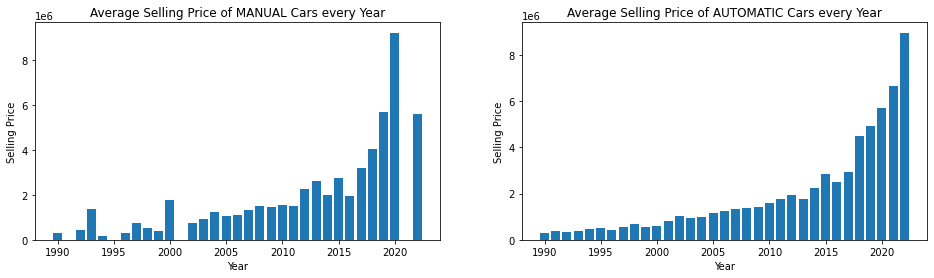

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of MANUAL Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of AUTOMATIC Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')
plt.show()

In [ ]:
year_mean_manual_price = df6[df6['gearbox']=='MANUAL'].groupby('year')['price'].mean()
year_mean_automatic_price = df6[df6['gearbox']=='AUTOMATIC'].groupby('year')['price'].mean()
year_mean_manual_km = df6[df6['gearbox']=='MANUAL'].groupby('year')['mileage'].mean()
year_mean_automatic_km = df6[df6['gearbox']=='AUTOMATIC'].groupby('year')['mileage'].mean()

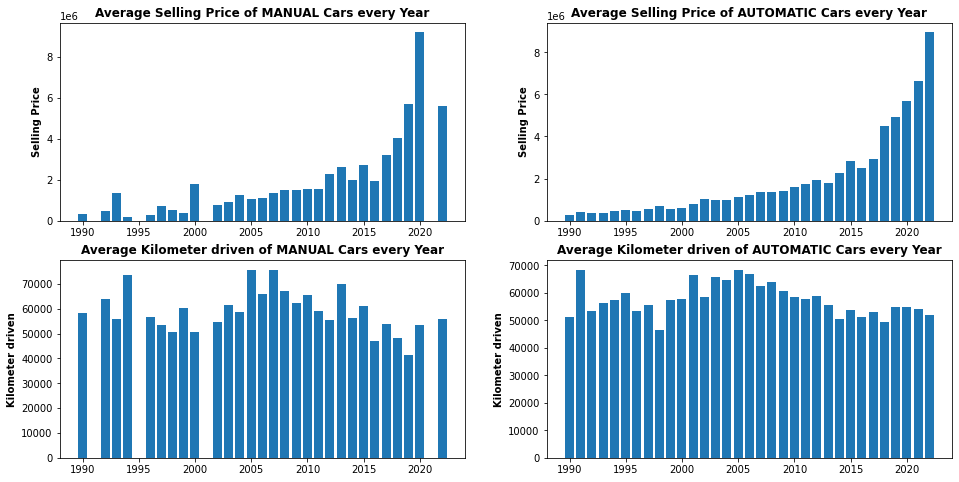

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,8))

ax[0][0].bar(year_mean_manual_price.index,year_mean_manual_price)
ax[0][1].bar(year_mean_automatic_price.index,year_mean_automatic_price)

ax[1][0].bar(year_mean_manual_km.index,year_mean_manual_km)
ax[1][1].bar(year_mean_automatic_km.index,year_mean_automatic_km)

ax[0][0].set_title('Average Selling Price of MANUAL Cars every Year' ,fontweight='bold')
ax[0][0].set_ylabel('Selling Price' ,fontweight='bold')

ax[0][1].set_title('Average Selling Price of AUTOMATIC Cars every Year' ,fontweight='bold')
ax[0][1].set_ylabel('Selling Price' ,fontweight='bold')

ax[1][0].set_title('Average Kilometer driven of MANUAL Cars every Year' ,fontweight='bold')
ax[1][0].set_ylabel('Kilometer driven' ,fontweight='bold')

ax[1][1].set_title('Average Kilometer driven of AUTOMATIC Cars every Year' ,fontweight='bold')
ax[1][1].set_ylabel('Kilometer driven' ,fontweight='bold')

plt.show()

In [ ]:
df7 = df6
manual = df7[df7['gearbox']=='MANUAL']
automatic = df7[df7['gearbox']=='AUTOMATIC']

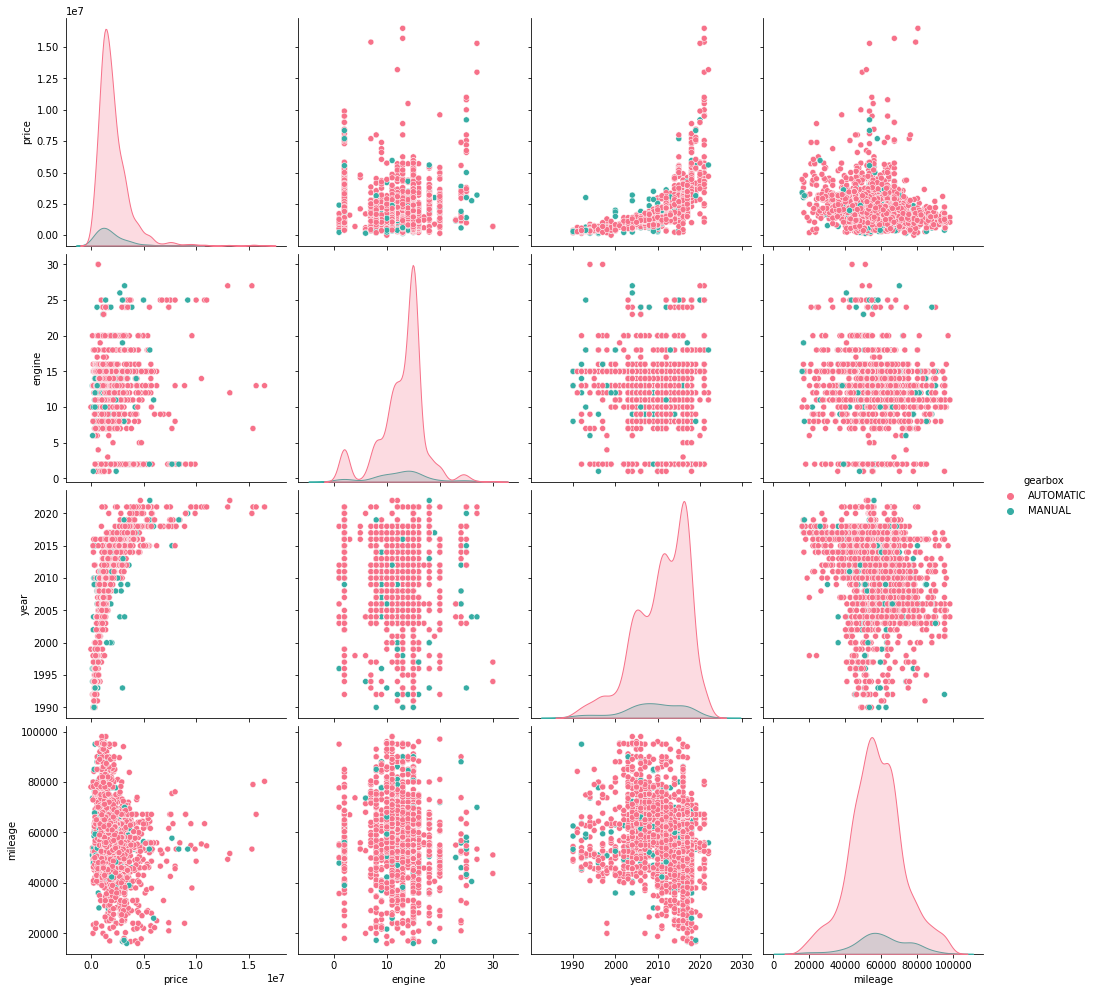

In [ ]:
sns.pairplot(df7,hue='gearbox',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

mileage decreases whereas selling price increases over the years. We can also see that automatic cars have higher prices than manual cars. Now it's time to build our model.

In [ ]:
categorical_columns = ['gearbox','body_type', 'fuel_type', 'condition']
le = LabelEncoder()

for feat in categorical_columns:
    df7[feat] = le.fit_transform(df7[feat].astype(str))

columns = ['automatic', 'manual', 'gas', 'hybrid', 'other', 'petrol', 'hatch', 'mpv', 'sedan', 'suv/4x4', 'imported', 'used', 'engine', 'year', 'mileage']

gearbox = pd.get_dummies(df7['gearbox'])
fuel = pd.get_dummies(df7['fuel_type'])
body = pd.get_dummies(df7['body_type'])
condition = pd.get_dummies(df7['condition'])

X = pd.concat([gearbox,fuel, body, condition, df7.drop(['gearbox','fuel_type', 'body_type', 'condition','price'],axis=1)],axis=1)
X.columns = columns
y = df7['price']
X.tail()

,automatic,manual,gas,hybrid,other,petrol,hatch,mpv,sedan,suv/4x4,imported,used,engine,year,mileage
2369,1,0,0,0,0,1,0,0,1,0,0,1,8.0,2015.0,51999.0
2371,1,0,0,0,0,1,0,0,1,0,0,1,8.0,2009.0,59000.0
2373,1,0,0,0,0,1,0,0,1,0,0,1,8.0,2010.0,61000.0
2374,1,0,1,0,0,0,0,0,1,0,0,1,8.0,2005.0,67000.0
2376,1,0,1,0,0,0,0,0,1,0,0,1,8.0,2008.0,75210.0


In [ ]:
df_numeric_trans = df7
df_numeric_trans.year = df_numeric_trans.year - df_numeric_trans.year.min()
df_numeric_trans.mileage = np.log(df_numeric_trans.mileage + 1)*(-1)
df_numeric_trans.price = np.log(df_numeric_trans.price)
df_numeric_trans.tail()

,price,engine,year,mileage,gearbox,body_type,fuel_type,condition
2369,14.799460,8.0,25.0,-10.858999,0,2,3,1
2371,13.623138,8.0,19.0,-10.985310,0,2,3,1
2373,14.518608,8.0,20.0,-11.018645,0,2,3,1
2374,13.849912,8.0,15.0,-11.112463,0,2,0,1
2376,14.322329,8.0,18.0,-11.228053,0,2,0,1


In [ ]:
X_trans = X
y_trans = y
X_trans.year = X_trans.year - X_trans.year.min()
X_trans.mileage = np.log(X_trans.mileage + 1)*(-1)
y_trans.price = np.log(y_trans)
X_trans.tail()

,automatic,manual,gas,hybrid,other,petrol,hatch,mpv,sedan,suv/4x4,imported,used,engine,year,mileage
2369,1,0,0,0,0,1,0,0,1,0,0,1,8.0,25.0,-10.858999
2371,1,0,0,0,0,1,0,0,1,0,0,1,8.0,19.0,-10.985310
2373,1,0,0,0,0,1,0,0,1,0,0,1,8.0,20.0,-11.018645
2374,1,0,1,0,0,0,0,0,1,0,0,1,8.0,15.0,-11.112463
2376,1,0,1,0,0,0,0,0,1,0,0,1,8.0,18.0,-11.228053


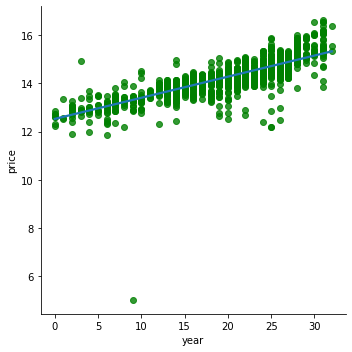

In [ ]:
sns.lmplot(x = 'year', y = 'price', data = df_numeric_trans, scatter_kws = {'color':'green'}, ci = False)

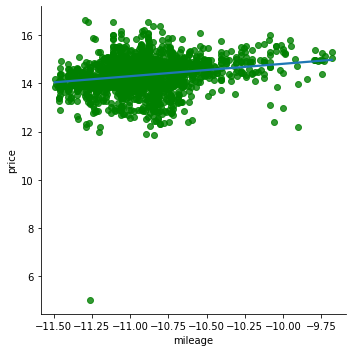

In [ ]:
sns.lmplot(x = 'mileage', y = 'price', data = df_numeric_trans, scatter_kws = {'color':'green'}, ci = False)

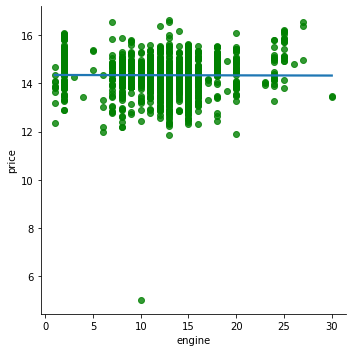

In [ ]:
sns.lmplot(x = 'engine', y = 'price', data = df_numeric_trans, scatter_kws = {'color':'green'}, ci = False)

In [ ]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = label
    df_results["Predicted"] = predictions
    df_results['Residuals'] = abs(df_results['price']) - abs(df_results['Predicted'])
    
    return df_results

def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Log(Price) = B0 + B1(Automatic) + B2 (manual) + B3(gas) + B4(hybrid) + B5(other) + B6(petrol) + B13(engine) + B14(log(mileage+1)*(-1)) + B15(year-1990)

---hybrid', 'other', 'petrol', 'hatch', 'mpv', 'sedan', 'suv/4x4', 'imported', 'used'



0.7097775453734785
Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 8.290574235434288e-16
Residuals are not normally distributed


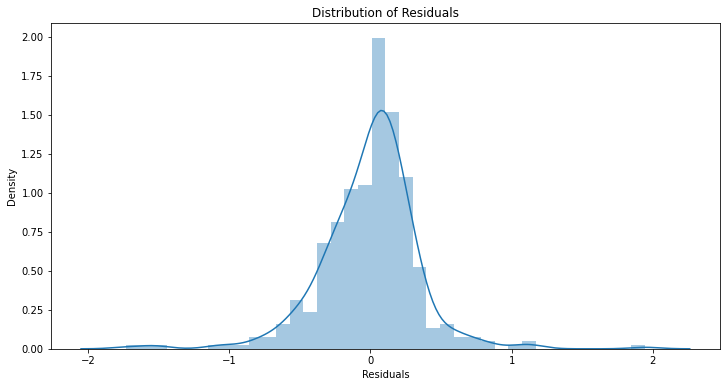


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
lr = LinearRegression()
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_trans,y_trans,test_size=0.2,random_state=10)
lr.fit(X_train_all,y_train_all)
print(lr.score(X_test_all, y_test_all))
normal_errors_assumption(lr, X_test_all, pd.DataFrame(y_test_all))

In [ ]:
lr.coef_

array([ 7.10378458e-08, -9.68575478e-08,  1.25728548e-08,  1.10827386e-07,
        3.93483788e-08,  2.24448740e-07,  1.49011612e-08, -1.76951289e-08,
        1.00000000e+00], dtype=float32)

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X_trans,y_trans, cv=cv)

array([0.5043901 , 0.78010526, 0.75011316, 0.7527983 , 0.75164461])

0.6424452282103094
Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 6.706801628431978e-13
Residuals are not normally distributed


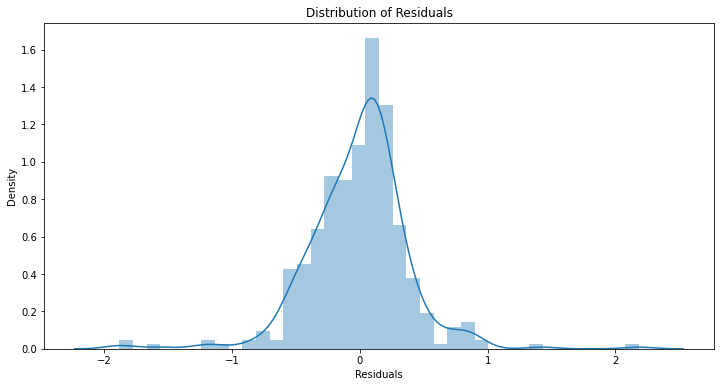


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
lr = LinearRegression()
X_, y_ = df_numeric_trans[['year', 'mileage', 'engine']], df_numeric_trans[['price']]
X_train, X_test, y_train, y_test = train_test_split(X_, y_,test_size=0.2,random_state=10)
lr.fit(X_train,y_train)
print(lr.score(X_test, y_test))
normal_errors_assumption(lr, X_test, y_test)

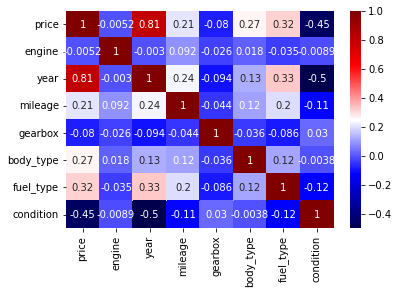

In [ ]:
sns.heatmap(df_numeric_trans.corr(), annot = True, cmap = "seismic");

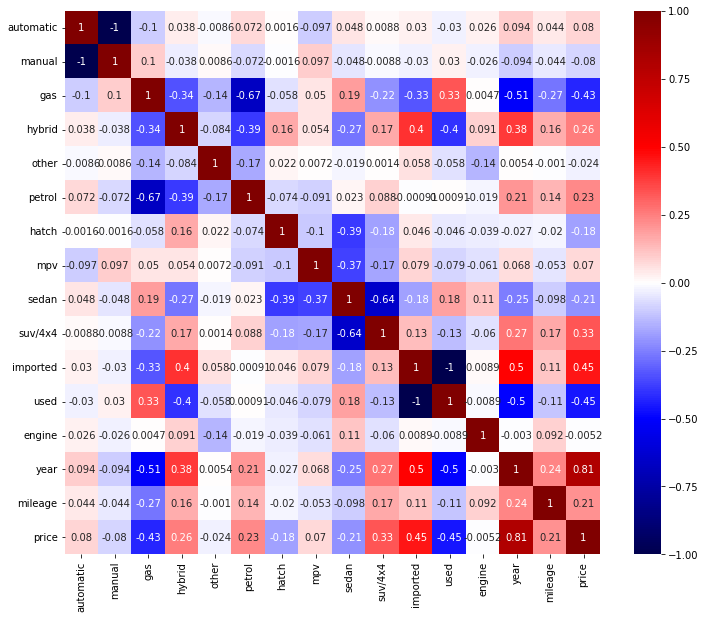

In [ ]:
full_xy = X
full_xy['price'] = y
corr = full_xy.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic")

In [ ]:
X_reduce = X_trans.drop(['manual', 'gas', 'other', 'hatch', 'sedan', 'used', 'engine'], axis=1)
X_reduce.tail()

,automatic,hybrid,petrol,mpv,suv/4x4,imported,year,mileage,price
2369,1,0,1,0,0,0,25.0,-10.858999,14.799460
2371,1,0,1,0,0,0,19.0,-10.985310,13.623138
2373,1,0,1,0,0,0,20.0,-11.018645,14.518608
2374,1,0,0,0,0,0,15.0,-11.112463,13.849912
2376,1,0,0,0,0,0,18.0,-11.228053,14.322329


0.9999999999996229
Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


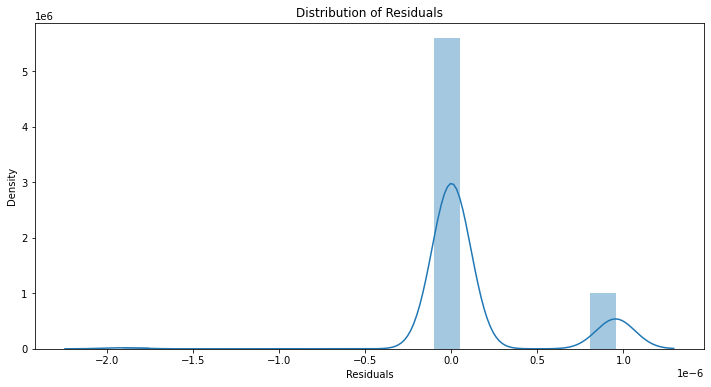


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
lr = LinearRegression()
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduce,y_trans,test_size=0.2,random_state=10)
lr.fit(X_train_r,y_train_r)
print(lr.score(X_test_r, y_test_r))
normal_errors_assumption(lr, X_test_r, pd.DataFrame(y_test_r))

# END

# Correlation of Features


In [ ]:
plt.figure(figsize = (12,10))
df8 = df7.drop(["air_condition"], axis=1)
sns.heatmap(df8.corr(), annot = True, cmap = "seismic");

KeyError: ignored

<Figure size 864x720 with 0 Axes>

In [ ]:
df7.dtypes

In [ ]:
X = df7.drop(["price", "created_date"], axis=1)
y = df7['price']
X_train, X_test, y_train, y_test = train_test_split(X[['mileage', 'year', 'engine']],y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X.tail()

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

In [ ]:
scale_vars = ['mileage', 'year', 'engine']

scaler = MinMaxScaler()
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

In [ ]:
df10 = df_new[(df_new.body_type == 'Sedan') & (df_new.fuel_type == 'Petrol') & (df_new.model == 'Toyota Premio') & (df_new.condition=='Used')]
df10 = df10[ (df10.mileage != -1) & (df10.year != -1)]
len(df10)

In [ ]:
# df2.location = df2.location.str.replace('GAZIPUR', 'DHAKA')
# df2.location = df2.location.replace(to_replace = '\b(?!DHAKA\b)\w+', value='outside_dhaka',  regex=True)
# df2.location.value_counts()

In [ ]:
# df_body_type = df2[df2.groupby('body_type').body_type.transform('count') > 3]
# df_body_type['body_type'].value_counts()

In [ ]:
# temp_df = df_car_model[(df_car_model.mileage != -1.0)]
# avg = temp_df.mileage.mean()
# df_car_model['mileage'].mask(df_car_model['mileage'] == float(-1), int(avg), inplace=True)
# len(df_car_model)

In [ ]:
# temp_df = df_car_model[(df_car_model.engine != -1.0)]
# avg = temp_df.engine.mean()
# df_car_model['engine'].mask(df_car_model['engine'] == float(-1), int(avg), inplace=True)
# df_car_model.head()
# df_car_model.mileage.nunique()

In [ ]:
newdf = df_car_model
newdf['weekly_created'] = newdf['created_date'].apply(lambda x:x.strftime('%A'))
newdf['yearly_created'] = newdf['created_date'].apply(lambda x:x.strftime('%Y'))
newdf['monthly_created'] = newdf['created_date'].apply(lambda x:x.strftime('%B'))

In [ ]:
features = ['weekly_created', 'monthly_created', 'yearly_created'] 
for f in features:
    sns.countplot(x = f, data = newdf)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# # df_car_model.location = df_car_model.location.map({"Chattagam":"Chittagong", "Gazipur":"Dhaka"})
# df_car_model.location = df_car_model.location.str.replace('Chattagam', 'Chittagong')
# df_car_model.location = df_car_model.location.str.replace('Gazipur', 'Dhaka')
# df_car_model.location.value_counts()

In [ ]:
# options = ["Dhaka", "Chittagong"]
# df_car_model = df_car_model[df_car_model.location.isin(options)]

In [ ]:
# df_car_model = df_car_model[df_car_model['color'].map(df_car_model['color'].value_counts()) > 20]
# df_car_model.color.value_counts()

In [ ]:
# df_car_model = df_car_model[df_car_model['body_type'].map(df_car_model['body_type'].value_counts()) > 50]
# df_car_model.body_type.value_counts()

In [ ]:
# df_car_model.body_type = df_car_model.body_type.str.replace('4 Wheel Drives & SUVs', '4x4')
# df_car_model.body_type = df_car_model.body_type.str.replace('Hatchback & Station Wagons', 'station_wagons')
# df_car_model.body_type = df_car_model.body_type.str.replace('Buses & Vans', 'buser_vans')
# df_car_model.body_type = df_car_model.body_type.str.replace('People mover', 'people_mover')